In [1]:
import pandas as pd 
import numpy as np 



import seaborn as sns
import matplotlib.pyplot as plt

import IPython

from PIL import Image
import requests
from io import BytesIO

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import pairwise_distances

from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('restaurent Dataset.csv')
df.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
2093,https://www.zomato.com/bangalore/alloro-the-ot...,"The Oterra, 43, Phase 1, Electronic City, Bang...",Alloro - The Oterra,No,Yes,4.0/5,63,080 39854710,Electronic City,Fine Dining,"Pasta, Pizza, Tiramisu, Minestrone Soup, Mushr...",Italian,"2,500",Dine-out,Electronic City
193,https://www.zomato.com/bangalore/subz-jayanaga...,"Cosmopolitan Club, Ground Floor, 22nd Cross, 3...",Subz,Yes,Yes,4.2/5,2022,080 49652607,Jayanagar,Casual Dining,"Veg Buffet, Pasta, Salads, Rasmalai, Chaat, Bi...","North Indian, South Indian","1,000",Delivery,Banashankari
2136,https://www.zomato.com/bangalore/vijaya-garden...,"Opposite Orion East Mall, Jai Bharat Nagar, Ba...",Vijaya Gardenia,Yes,No,3.4/5,63,080 49574999,Banaswadi,Casual Dining,"Naan, Sea Food, Biryani, Lime Soda","North Indian, Chinese, Andhra",500,Delivery,Frazer Town
539,https://www.zomato.com/bangalore/tree-top-wils...,"Temple Tree Hotel, 3, 9th Cross, Wilson Garden...",Tree Top,Yes,No,3.8/5,74,080 49652744,Wilson Garden,Casual Dining,Friendly Staff,"Continental, Chinese, North Indian, South Indian","1,000",Buffet,Basavanagudi
1803,https://www.zomato.com/bangalore/rashtrakutas-...,"85/6, 15th Cross, 19th Main, Sector 1, HSR, Ba...",Rashtrakutas,Yes,Yes,3.9/5,402,+91 8884459955\r\n+91 8884495599,HSR,Casual Dining,"Gulkand Ice Cream, Thali, Corn Paratha, Donne ...","South Indian, Biryani, North Indian",800,Delivery,BTM


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          3159 non-null   object
 1   address                      3159 non-null   object
 2   name                         3159 non-null   object
 3   online_order                 3159 non-null   object
 4   book_table                   3159 non-null   object
 5   rate                         3159 non-null   object
 6   votes                        3159 non-null   int64 
 7   phone                        3159 non-null   object
 8   location                     3159 non-null   object
 9   rest_type                    3159 non-null   object
 10  dish_liked                   3159 non-null   object
 11  cuisines                     3159 non-null   object
 12  approx_cost(for two people)  3159 non-null   object
 13  listed_in(type)              3159

In [4]:
df.isnull().sum()

# no null values are present

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Columns to use for recommendation

**rest_type:** It contains the type of restaurent.<br>
**cuisines:** It contains the cuisines served by the restaurent.<br>
**dish_liked:** It contains the most liked dished of restaurent by the people.<br>
**approx_cost(for two people):** It contains the food cost for two people. 

# EDA on votes feature

<AxesSubplot:xlabel='votes', ylabel='Count'>

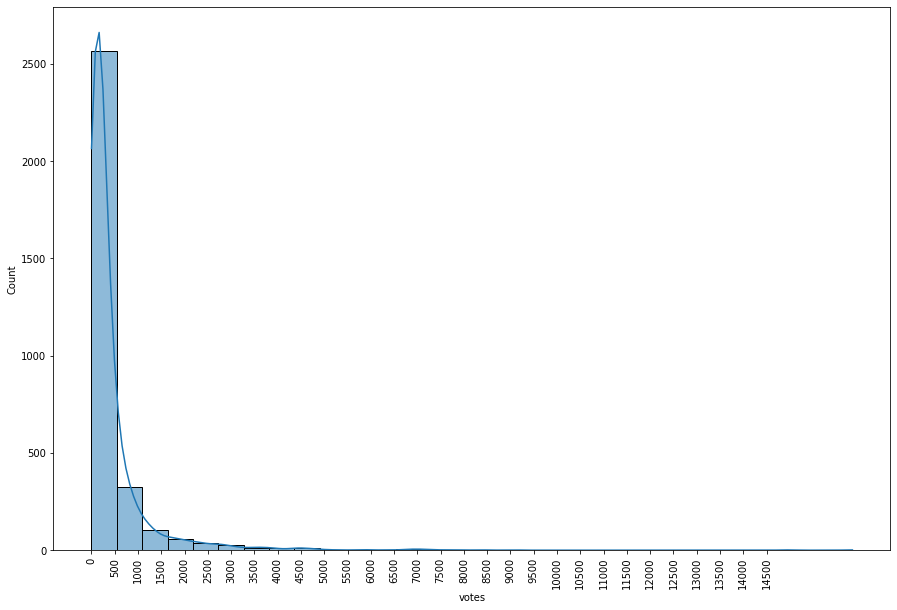

In [5]:
plt.figure(figsize=(15,10))
plt.xticks([i * 500 for i in range(30)], rotation=90)
sns.histplot(data=df['votes'], kde=True, bins=30)

In [6]:
for i in range(11):
    print(f'{10*i}th percentile:  {np.percentile(df["votes"], 10*i)}')

0th percentile:  0.0
10th percentile:  52.0
20th percentile:  72.0
30th percentile:  96.0
40th percentile:  129.0
50th percentile:  174.0
60th percentile:  232.0
70th percentile:  334.5999999999999
80th percentile:  516.8000000000002
90th percentile:  949.2000000000003
100th percentile:  16345.0


In [7]:
for i in range(11):
    print(f'{90+i}th percentile:  {np.percentile(df["votes"], 90+i)}')

90th percentile:  949.2000000000003
91th percentile:  1040.900000000001
92th percentile:  1142.3600000000001
93th percentile:  1239.7000000000003
94th percentile:  1428.7199999999998
95th percentile:  1704.3999999999987
96th percentile:  1973.3599999999997
97th percentile:  2341.5999999999976
98th percentile:  2859.84
99th percentile:  3918.7800000000043
100th percentile:  16345.0


**Observation:**<br>
-- more than 50% of restaurent have less than 250 number of votes<bR>
-- more than 90% of restaurent have less than 1500 number of votes

In [8]:
df['rate']

0        4.1/5
1        4.1/5
2        3.8/5
3        3.7/5
4        3.8/5
         ...  
3154    3.0 /5
3155    2.6 /5
3156    2.7 /5
3157    4.3 /5
3158    3.8 /5
Name: rate, Length: 3159, dtype: object

In [9]:
df['rate'] = df['rate'].apply(lambda x: float(x[:3]))
# so we have an unepected value 'NEW' in rating so we need to deal with that

ValueError: could not convert string to float: 'NEW'

In [ ]:
# confirming NEW value
df['rate'].unique()

In [10]:
# counting how many 'NEW' value is present it is 147
# we will handle this new value as missing value with Imputation
df['rate'].loc[df['rate'] == 'NEW']

308     NEW
524     NEW
525     NEW
530     NEW
538     NEW
587     NEW
784     NEW
988     NEW
1567    NEW
1696    NEW
1698    NEW
1955    NEW
2083    NEW
2086    NEW
2133    NEW
2163    NEW
2231    NEW
2317    NEW
2328    NEW
2394    NEW
2507    NEW
2593    NEW
2640    NEW
2644    NEW
2661    NEW
2684    NEW
2928    NEW
2969    NEW
2970    NEW
3025    NEW
3061    NEW
3068    NEW
3072    NEW
3113    NEW
Name: rate, dtype: object

In [11]:
df['rate'].replace(to_replace='NEW', value='0.0', inplace=True)

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '0.0', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '4.2 /5', '4.1 /5', '2.7 /5', '4.3 /5', '4.0 /5', '4.9/5',
       '3.9 /5', '2.1/5', '2.0/5', '4.4 /5', '4.5 /5', '1.8/5', '4.6 /5',
       '3.7 /5', '2.6 /5', '3.5 /5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.7 /5', '2.8 /5', '2.9 /5', '3.1 /5', '3.0 /5', '2.3 /5',
       '2.5 /5', '4.8 /5', '2.4 /5', '3.2 /5', '4.9 /5'], dtype=object)

In [13]:
df['rate'] = df['rate'].apply(lambda x: float(x[:3]))

In [14]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 0. , 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [15]:
imp = SimpleImputer(missing_values=0, strategy='median')
imp.fit(df['rate'].to_numpy().reshape(-1,1))

SimpleImputer(missing_values=0, strategy='median')

In [16]:
df['rate'] = pd.Series(imp.transform(df['rate'].to_numpy().reshape(-1,1)).flatten())
sorted(df['rate'].unique())

[1.8,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9]

In [17]:
df['rate'].describe()

count    3159.000000
mean        3.854669
std         0.417534
min         1.800000
25%         3.700000
50%         3.900000
75%         4.100000
max         4.900000
Name: rate, dtype: float64

<AxesSubplot:xlabel='rate', ylabel='Density'>

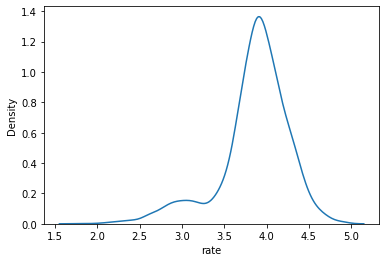

In [18]:
sns.kdeplot(df['rate'])

**observation:-**<br>
-- Most common rating is between 3.5 and 4.5 

In [19]:
def str_to_num(str_num):
    
    temp = ""
    for i in str_num:
        if i.isnumeric() == True:
            temp = temp + i
            
    return int(temp)

In [20]:
str_to_num('10,abc000')

10000

In [21]:
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
        ...  
3154      600
3155      500
3156      400
3157    2,500
3158      600
Name: approx_cost(for two people), Length: 3159, dtype: object

In [22]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(str_to_num)

df['approx_cost(for two people)']

0        800
1        800
2        800
3        300
4        600
        ... 
3154     600
3155     500
3156     400
3157    2500
3158     600
Name: approx_cost(for two people), Length: 3159, dtype: int64

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

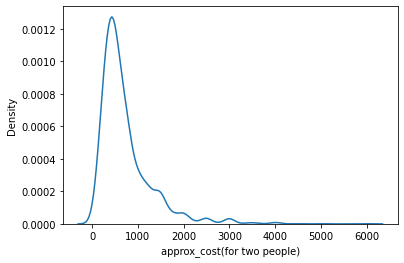

In [23]:
sns.kdeplot(df['approx_cost(for two people)'])

# feaaturization

In [24]:
def pre_processing(text):
    
    
    text_lst = text.split(',')
    
    temp = []
    for i in text_lst:
        
        i = i.strip()
        i = i.replace(' ','_')
        temp.append(i)
    
    return ' '.join(temp)

In [25]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway, Delivery', 'Food Truck', 'Quick Bites, Dessert Parlor',
       'Pub, Casual Dining', 'Casual Dining, Bar', 'Bakery', 'Sweet Shop',
       'Dessert Parlor, Beverage Shop', 'Beverage Shop, Quick Bites',
       'Microbrewery, Casual Dining', 'Sweet Shop, Quick Bites', 'Lounge',
       'Food Court', 'Cafe, Bakery', 'Microbrewery', 'Kiosk', 'Pub, Bar',
       'Casual Dining, Pub', 'Cafe, Quick Bites', 'Lounge, Bar',
       'Bakery, Quick Bites', 'Dessert Parlor, Quick Bites',
       'Bar, Casual Dining', 'Beverage Shop, Dessert Parlor',
       'Casual Dining, Microbrewery', 'Mess', 'Lounge, Casual Dining',
       'Cafe, Dessert Parlor', 'Dessert Parlor, Cafe',
       'Bakery, Dessert Parlor', 'Takeaway', 'Microbrewery, Pub', 'Club',
       'Fine Dining', 'Bakery, Cafe', 'Beverage Shop, C

# processing rest_type feature for featurization

In [26]:
df['rest_type'] = df['rest_type'].apply(pre_processing)

In [27]:
df['rest_type'].sample(20)

187     Dessert_Parlor Beverage_Shop
1233               Pub Casual_Dining
552                             Cafe
229                      Quick_Bites
1839                   Casual_Dining
2757                     Quick_Bites
1518                     Quick_Bites
2739                            Cafe
2555                   Casual_Dining
1977                            Cafe
408                            Kiosk
1740                     Quick_Bites
1318               Casual_Dining Bar
186                      Quick_Bites
1589                            Cafe
11                              Cafe
2183                   Casual_Dining
2067                   Casual_Dining
297                      Quick_Bites
2038                     Quick_Bites
Name: rest_type, dtype: object

# processing cuisines feature for featurization

In [28]:
df['cuisines'] = df['cuisines'].apply(pre_processing)

In [29]:
df['cuisines'].sample(20)

332                                  North_Indian Chinese
1760                         North_Indian Arabian Chinese
1723          North_Indian South_Indian Chinese Fast_Food
1450                                         North_Indian
1679                                                 Cafe
1523                      Fast_Food Sandwich South_Indian
1722         North_Indian Fast_Food Street_Food Beverages
2680                         European Mediterranean Salad
1576                                 North_Indian Chinese
791            North_Indian Street_Food Chinese Fast_Food
2338                                      Desserts Bakery
424                                              Desserts
2398           Continental Salad Burger Finger_Food Pizza
1942                                            Beverages
2492                          Andhra Chinese North_Indian
134                 Street_Food North_Indian South_Indian
1313                      North_Indian South_Indian Asian
1200          

# processing dish_liked feature for featurization

In [30]:
df['dish_liked'] = df['dish_liked'].apply(pre_processing)

In [31]:
df['dish_liked'].sample(20)

1830    Noodles Rice_Paper_Rolls Prawn_Dumplings Veget...
2531        Chilli_Chicken Chicken_Tikka Butter_Naan Roti
1772    Chaach Bhindi_Anardana Thandai Jal-jeera Lunch...
975     Peri_Peri_Chicken Peri_Peri_Fries Peri_Peri_Dr...
2793    Fries Sandwich Paan_Shake Pasta Sandwiches Noo...
2770    Dhokla Tea Lassi Tiranga_Paratha Sandwich Pizz...
1561    Noodles Chicken_Dim_Sum Pad_Thai_Noodle Jumbo_...
2607    Ramen Kimchi Beef_Bulgogi Egg_Soup Salad Clear...
982                    Chicken_Biryani Lemon_Chicken_Roll
2600        Appam Roast_Chicken Duck_Roast Vegetable_Stew
812     Cocktails Noodles Chips Shephards_Pie Lamb Piz...
887     Veg_Thali Dahi_Vada Malpua Rajasthani_Thali Ra...
2173                                     Sandwich Burgers
756                                                 Thali
2473    Coffee Caramel_Macchiato Cappuccino Cafe_Mocha...
320     Chicken_Grill Garlic_Bread Mocktails Burgers F...
2269    Dark_Chocolate_Shake Cappuccino Pancakes Hot_C...
1530    Masala

In [32]:
bow_model = CountVectorizer()

# featurizing the rest_type feature using BOW

In [33]:
bow_model.fit(df['rest_type'])

CountVectorizer()

In [34]:
bow_model.vocabulary_

{'casual_dining': 4,
 'cafe': 3,
 'quick_bites': 17,
 'delivery': 6,
 'dessert_parlor': 7,
 'pub': 16,
 'beverage_shop': 2,
 'bar': 1,
 'takeaway': 19,
 'food_truck': 10,
 'bakery': 0,
 'sweet_shop': 18,
 'microbrewery': 15,
 'lounge': 13,
 'food_court': 9,
 'kiosk': 12,
 'mess': 14,
 'club': 5,
 'fine_dining': 8,
 'irani_cafee': 11}

In [35]:
bow_vec_rest_type = bow_model.transform(df['rest_type'])

In [36]:
print(bow_vec_rest_type[0])

  (0, 4)	1


# featurizing the cuisines feature using BOW

In [37]:
bow_model.fit(df['cuisines'])

CountVectorizer()

In [38]:
bow_model.vocabulary_

{'north_indian': 69,
 'mughlai': 65,
 'chinese': 26,
 'thai': 93,
 'cafe': 22,
 'mexican': 60,
 'italian': 44,
 'south_indian': 85,
 'rajasthani': 75,
 'pizza': 73,
 'continental': 28,
 'momos': 64,
 'beverages': 14,
 'fast_food': 31,
 'american': 3,
 'french': 33,
 'european': 30,
 'burger': 20,
 'biryani': 16,
 'street_food': 89,
 'rolls': 77,
 'ice_cream': 41,
 'desserts': 29,
 'andhra': 4,
 'healthy_food': 39,
 'salad': 79,
 'asian': 6,
 'korean': 52,
 'indonesian': 42,
 'japanese': 45,
 'goan': 35,
 'seafood': 81,
 'kebab': 49,
 'steak': 88,
 'sandwich': 80,
 'bakery': 9,
 'vietnamese': 97,
 'juices': 47,
 'arabian': 5,
 'bbq': 11,
 'mangalorean': 57,
 'tea': 91,
 'afghani': 1,
 'finger_food': 32,
 'tibetan': 94,
 'mithai': 62,
 'middle_eastern': 61,
 'mediterranean': 58,
 'bengali': 13,
 'charcoal_chicken': 24,
 'kerala': 50,
 'oriya': 70,
 'bihari': 15,
 'roast_chicken': 76,
 'bohri': 17,
 'african': 2,
 'lebanese': 53,
 'hyderabadi': 40,
 'belgian': 12,
 'south_american': 84,
 

In [39]:
bow_vec_cusines = bow_model.transform(df['cuisines'])

In [40]:
print(bow_vec_cusines[0])

  (0, 26)	1
  (0, 65)	1
  (0, 69)	1


# featurizing the dish_liked feature using BOW

In [41]:
bow_model.fit(df['dish_liked'])



CountVectorizer()

In [42]:
bow_model.vocabulary_

{'pasta': 1614,
 'lunch_buffet': 1229,
 'masala_papad': 1298,
 'paneer_lajawab': 1573,
 'tomato_shorba': 2125,
 'dum_biryani': 802,
 'sweet_corn_soup': 2022,
 'momos': 1376,
 'chocolate_nirvana': 592,
 'thai_green_curry': 2090,
 'paneer_tikka': 1597,
 'chicken_biryani': 387,
 'churros': 625,
 'cannelloni': 307,
 'minestrone_soup': 1342,
 'hot_chocolate': 1017,
 'pink_sauce_pasta': 1686,
 'salsa': 1872,
 'veg_supreme_pizza': 2181,
 'masala_dosa': 1288,
 'panipuri': 1604,
 'gol_gappe': 966,
 'onion_rings': 1513,
 'kadhai_paneer': 1096,
 'salads': 1867,
 'salad': 1866,
 'roti': 1849,
 'jeera_rice': 1075,
 'farmhouse_pizza': 860,
 'chocolate_banana': 560,
 'virgin_mojito': 2204,
 'lime_soda': 1217,
 'prawn_pizza': 1754,
 'pizza': 1690,
 'mocktails': 1371,
 'coffee': 647,
 'nachos': 1477,
 'sandwiches': 1884,
 'waffles': 2208,
 'coleslaw_sandwich': 654,
 'choco_waffle': 556,
 'tacos': 2040,
 'cheese_nachos': 354,
 'crispy_chicken': 698,
 'honey_chilli_chicken': 1013,
 'sandwich': 1883,
 'cr

In [43]:
bow_vec_dish_liked = bow_model.transform(df['dish_liked'])

In [44]:
print(bow_vec_dish_liked[0])

  (0, 802)	1
  (0, 1229)	1
  (0, 1298)	1
  (0, 1573)	1
  (0, 1614)	1
  (0, 2022)	1
  (0, 2125)	1


In [45]:
price_feature = df['approx_cost(for two people)']

In [46]:
price_feature[0]

800

In [47]:
from scipy.sparse import hstack

In [48]:
final_feature = hstack((bow_vec_rest_type, bow_vec_cusines,bow_vec_dish_liked, price_feature.to_numpy().reshape(-1, 1))).tocsr()


In [49]:
print(final_feature[0])

  (0, 4)	1
  (0, 46)	1
  (0, 85)	1
  (0, 89)	1
  (0, 921)	1
  (0, 1348)	1
  (0, 1417)	1
  (0, 1692)	1
  (0, 1733)	1
  (0, 2141)	1
  (0, 2244)	1
  (0, 2365)	800


In [50]:
print(final_feature[0])

  (0, 4)	1
  (0, 46)	1
  (0, 85)	1
  (0, 89)	1
  (0, 921)	1
  (0, 1348)	1
  (0, 1417)	1
  (0, 1692)	1
  (0, 1733)	1
  (0, 2141)	1
  (0, 2244)	1
  (0, 2365)	800


# recommendation engine building

In [51]:
def recommendation(rst_lst, rst_id):
    
    cosine_dist = pairwise_distances(rst_lst, rst_lst[rst_id],metric='cosine')
    
    # np.argsort return index according to sorting means let we have 100 as max number in our array and its index is 14
    # so it will return new array whose first element will be 14
    
    
    return np.argsort(cosine_dist.flatten())[1:21]

In [52]:

def model(rst_lst, rst_id):
    dd = recommendation(rst_lst, rst_id)
    
    display("Restaurent selected By you")
    
    display(f"Restaurent name: {df['name'][rst_id]}")
    display(f"Restaurent Cusine: {df['cuisines'][rst_id]}")
      
    
    
    display("Recommendation of restaurent on basis of restaurent selected by you")
    display('--'*50) 
    for j, i in enumerate(dd):
        
         
        display(f"{j+1}. Restaurent name: {df['name'][i]}")
        display(f"Restaurent Cusine: {df['cuisines'][i]}")
        display(f"Restaurent Address: {df['address'][i]}")
        display(f"Restaurent most dish liked : {df['dish_liked'][i]}")
        display('--'*50)   
#         display(f"Book name: {df['title'][i]}")
#         display(f"Book Author: {df['author'][i]}")
#         display(f"Book rating: {df['rating'][i]}")
#         display(f"Book Genre: {df['genres'][i]}")


In [55]:
model( final_feature, int(input('Enter restaurent ID: ')))

Enter restaurent ID: 156


'Restaurent selected By you'

'Restaurent name: The Krishna Grand Xpress'

'Restaurent Cusine: South_Indian Fast_Food'

'Recommendation of restaurent on basis of restaurent selected by you'

'----------------------------------------------------------------------------------------------------'

'1. Restaurent name: Panchami Garden'

'Restaurent Cusine: South_Indian North_Indian'

'Restaurent Address: 56/1, Next to Airtel Office, Stage 1, Bannerghatta Road, Bangalore'

'Restaurent most dish liked : Masala_Dosa Idli'

'----------------------------------------------------------------------------------------------------'

'2. Restaurent name: Vishnu Garden'

'Restaurent Cusine: South_Indian'

'Restaurent Address: 335, Near Post Office, RT Nagar, Bangalore'

'Restaurent most dish liked : Vada Filter_Coffee Masala_Dosa'

'----------------------------------------------------------------------------------------------------'

'3. Restaurent name: Udupi Grand Veg'

'Restaurent Cusine: South_Indian'

'Restaurent Address: 152/2,Opposite Government Hospital, Shanbogh Layout, Doddanekkundi, Marathahalli, Bangalore'

'Restaurent most dish liked : Chole Roti Vada'

'----------------------------------------------------------------------------------------------------'

'4. Restaurent name: Pai Vihar'

'Restaurent Cusine: South_Indian Street_Food Chinese Fast_Food'

'Restaurent Address: 16/A, Ground Floor, Kkmp Building, Vasanth Nagar, Bangalore'

'Restaurent most dish liked : Masala_Dosa Coffee'

'----------------------------------------------------------------------------------------------------'

'5. Restaurent name: Cafe Palnad'

'Restaurent Cusine: South_Indian Fast_Food'

'Restaurent Address: 532-531 8th Cross Road, Neeladri Nagar, Electronics City Phase 1, Doddathoguru, Electronic City, Bangalore'

'Restaurent most dish liked : Pizza_Dosa Chicken_Kheema_Dosa Keema_Dosa Masala_Dosa'

'----------------------------------------------------------------------------------------------------'

'6. Restaurent name: Udupi Bhavan'

'Restaurent Cusine: Chinese North_Indian South_Indian'

'Restaurent Address: 37, Harlur Road, Next to Indian Oil Petrol Bunk, HSR, Bangalore'

'Restaurent most dish liked : Vada Masala_Dosa Coffee'

'----------------------------------------------------------------------------------------------------'

'7. Restaurent name: Udupi Sri Krishna Bhavan'

'Restaurent Cusine: South_Indian'

'Restaurent Address: 115/116, 1st Floor, Gandhibazaar, Basavanagudi, Bangalore'

'Restaurent most dish liked : Masala_Dosa Vada Obbattu Badam_Milk Khara_Bhath Coffee Puri_Saagu'

'----------------------------------------------------------------------------------------------------'

'8. Restaurent name: Dhanalakshmi Grand'

'Restaurent Cusine: South_Indian North_Indian'

'Restaurent Address: 267 Near 18Th Cross Signal, Sampige Road, Malleshwaram, Bangalore'

'Restaurent most dish liked : Masala_Dosa'

'----------------------------------------------------------------------------------------------------'

'9. Restaurent name: Addhuri Udupi Bhojana'

'Restaurent Cusine: South_Indian North_Indian'

'Restaurent Address: 1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore'

'Restaurent most dish liked : Masala_Dosa'

'----------------------------------------------------------------------------------------------------'

'10. Restaurent name: Upahara Darshini'

'Restaurent Cusine: North_Indian Chinese South_Indian Fast_Food'

'Restaurent Address: 9/2, South End Main Road, Next to Surana College, Basavanagudi, Bangalore'

'Restaurent most dish liked : Masala_Dosa'

'----------------------------------------------------------------------------------------------------'

'11. Restaurent name: Asha Food Camp'

'Restaurent Cusine: South_Indian Street_Food Fast_Food'

'Restaurent Address: 89, 1st Main, 10th Cross, Temple Street, Sampige Road, Malleshwaram, Bangalore'

'Restaurent most dish liked : Panneer_Butter_Masala Manchurian Fruit_Salad Idli Filter_Coffee Dhokla Kashmiri_Pulao'

'----------------------------------------------------------------------------------------------------'

'12. Restaurent name: Shanthi Sagar Deluxe'

'Restaurent Cusine: South_Indian North_Indian Fast_Food'

'Restaurent Address: 66, Coles Road, Frazer Town, Bangalore'

'Restaurent most dish liked : Masala_Dosa Coffee'

'----------------------------------------------------------------------------------------------------'

'13. Restaurent name: Sanman'

'Restaurent Cusine: North_Indian South_Indian Fast_Food Chinese'

'Restaurent Address: 212, Subedar Chatram Road, Nagappa Road, VV Giri Colony, Seshadripuram, Bangalore'

'Restaurent most dish liked : Rava_Dosa Filter_Coffee Masala_Dosa Pongal Rava_Idli Vada'

'----------------------------------------------------------------------------------------------------'

'14. Restaurent name: Sri Udupi Food Hub'

'Restaurent Cusine: South_Indian North_Indian Chinese Beverages'

'Restaurent Address: 155, 43rd Cross Road, 8th Block, Jayanagar, Bangalore'

'Restaurent most dish liked : Filter_Coffee Masala_Dosa Idli Vada'

'----------------------------------------------------------------------------------------------------'

'15. Restaurent name: Priyadarshini Veg'

'Restaurent Cusine: North_Indian South_Indian Chinese'

'Restaurent Address: 765, 1st Main Road, 5th Cross, Near RTO Office, Yeshwantpur, Bangalore'

'Restaurent most dish liked : Idli Masala_Dosa'

'----------------------------------------------------------------------------------------------------'

'16. Restaurent name: Upahar Sagar'

'Restaurent Cusine: South_Indian Chinese North_Indian'

'Restaurent Address: 727, 23rd Cross, KR Road, 2nd Stage, Banashankari, Bangalore'

'Restaurent most dish liked : Masala_Dosa'

'----------------------------------------------------------------------------------------------------'

"17. Restaurent name: Mc Donald's"

'Restaurent Cusine: Burger Fast_Food'

'Restaurent Address: 29, Whitefield - Hoskote Road, Seegehalli, Kadugodi, Whitefield, Bangalore'

'Restaurent most dish liked : Burgers'

'----------------------------------------------------------------------------------------------------'

'18. Restaurent name: Meat And Eat (ME)'

'Restaurent Cusine: Fast_Food Burger'

'Restaurent Address: 326, Ground Floor, Murgesh Palya, Old Airport Road, Bangalore'

'Restaurent most dish liked : Burgers'

'----------------------------------------------------------------------------------------------------'

'19. Restaurent name: Potato Bae'

'Restaurent Cusine: Fast_Food'

'Restaurent Address: 70, Prem Chambers, Jyothi Nivas Collage Road, Koramangala 5th Block, Bangalore'

'Restaurent most dish liked : Almond_Shake Pizza_Fries'

'----------------------------------------------------------------------------------------------------'

'20. Restaurent name: Rolls Mania'

'Restaurent Cusine: Fast_Food Rolls'

'Restaurent Address: 3rd Floor, Park Square Mall, ITPL Road, Whitefield, Bangalore'

'Restaurent most dish liked : Rolls'

'----------------------------------------------------------------------------------------------------'